# Visualizing CNNs

This little notebook will help you quickly visualize the processing of different layers in your convolutional neural network on an eample of a picture of a dog. Since CNNs are widely used in image recognition, it is very useful to see what is happening to the input picture in each layer, and what features the network actually "sees" in your pictures.

Let's start with some imports.

In [22]:
# First import Keras layers needed for the model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing import image # for image loading and manipulation
import numpy as np # for additional processing needed by Keras
import matplotlib.pyplot as plt # for plotting the images

Let us load the image in original dimensions and colors to check what input we are working with.

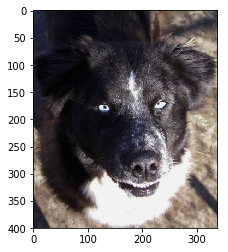

In [10]:
dog = image.load_img('dog.jpg')
plt.imshow(dog)
plt.show()

This certainly looks like a dog :) Keras allows us to load the image already in a target size for our network, so let's do that, and set the size to 64x64 pixels.

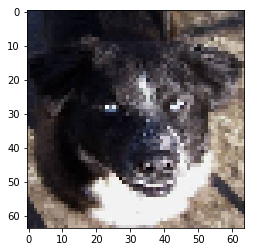

In [16]:
dog = image.load_img('dog.jpg',target_size=(64,64))
plt.imshow(dog)
plt.show()

Scaling to smaller images gives us a computational advantage, and in this example already shows us the pixels that our network will be working on to extract the features. 

In order to see what features our convolutional filters see in the image, we have to write a simple function, which adds some additional preprocessing (Keras expects a batch of images so we have to trick it with our single image). The function gets our model and the image as an input, and plots the output.

In [18]:
def show_features(classifier,dog):
    img = np.expand_dims(dog,axis=0)
    conv = classifier.predict(img)
    conv = np.squeeze(conv, axis=0)
    conv = conv.reshape(conv.shape[:2])
    plt.imshow(conv)
    plt.show()

Now, we have to convert our image into an array, initialize our model, and add the first convolutional layer. Then, we use our function to show us the features that were caught be the filter (for sake of simplicity we use just 1 filter in this example of size 3x3).

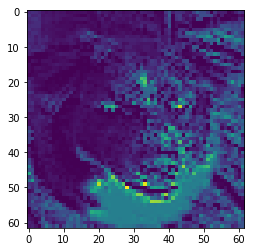

In [34]:
dog = image.img_to_array(dog)
classifier = Sequential()
classifier.add(Conv2D(1,(3,3), input_shape=dog.shape, activation='relu'))
show_features(classifier,dog)

Now, it's time to see what our model can see after adding a maxpooling layer. Since we are using a standard pool size of 2x2, our resulting image will be halfed in size.

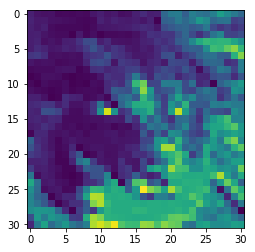

In [36]:
classifier = Sequential()
classifier.add(Conv2D(1,(3,3), input_shape=dog.shape, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
show_features(classifier,dog)

And that's it! As you can see, it is now easier to understand what each layer of CNN is doing with our image. We can go further and easily add more layers and visualize them too.